**Data from:** National-Scale Flood Risk Assessment Using GIS and Remote Sensing-Based Hybridized Deep Neural Network and Fuzzy Analytic Hierarchy Process Models: A Case of Bangladesh


**Method from:** https://github.com/omarseleem92/Machine_learning_for_flood_susceptibility/blob/main/RF_2m.ipynb which is of paper: Towards urban flood susceptibility mapping using data-driven models in Berlin, Germany

In [1]:
!pip install --upgrade geopandas

In [2]:
## import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
## Mount google drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df=gpd.read_file("/content/drive/MyDrive/Bangladesh Flood Susceptibility/FSM_data.shp")
df.head()


,OBJECTID,Bin,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect,Flood,geometry
0,1.0,0,5.894235,5029.622559,0.245175,21,-9.168831,2,2,2,20,1,5,0,POINT (92.10423 21.34454)
1,2.0,0,11.214844,2897.173584,0.109797,17,-1.612072,2,2,4,15,3,10,0,POINT (92.15584 21.15506)
2,3.0,0,7.147573,3649.064941,0.052007,77,-8.976060,2,2,2,15,1,5,0,POINT (92.17267 21.08142)
3,5.0,0,6.220735,5389.588867,0.141945,37,-9.115022,2,2,2,20,3,7,0,POINT (92.09751 21.23788)
4,6.0,0,10.389720,6310.666504,0.148418,22,-0.591980,2,2,2,20,3,9,0,POINT (92.11666 21.20269)


In [55]:
df.drop(['OBJECTID', 'Bin'], axis='columns', inplace=True)
df.head()

,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect,Flood,geometry
0,5.894235,5029.622559,0.245175,21,-9.168831,2,2,2,20,1,5,0,POINT (92.10423 21.34454)
1,11.214844,2897.173584,0.109797,17,-1.612072,2,2,4,15,3,10,0,POINT (92.15584 21.15506)
2,7.147573,3649.064941,0.052007,77,-8.976060,2,2,2,15,1,5,0,POINT (92.17267 21.08142)
3,6.220735,5389.588867,0.141945,37,-9.115022,2,2,2,20,3,7,0,POINT (92.09751 21.23788)
4,10.389720,6310.666504,0.148418,22,-0.591980,2,2,2,20,3,9,0,POINT (92.11666 21.20269)


In [56]:
print(df.describe().T)

             count         mean          std        min          25%  \
Slope       2766.0     4.367766     6.090303   0.000000     1.070934   
River_dist  2766.0  4194.176789  3822.904601   0.000000  1162.619171   
Drainage_d  2766.0     0.299849     0.075980   0.004733     0.273737   
Elevation   2766.0    36.829718    74.234735  -8.000000     7.000000   
SPI         2766.0    -4.028303     4.518408 -11.882338    -9.276267   
Soil_textu  2766.0     5.099783     2.133387   1.000000     4.000000   
Soil_perme  2766.0     2.290311     0.589198   1.000000     2.000000   
LULC        2766.0     2.754158     0.779676   1.000000     2.000000   
Geology     2766.0    13.896602     6.866656   1.000000     8.000000   
Curvature   2766.0     2.070499     0.940019   1.000000     1.000000   
Aspect      2766.0     5.907809     2.318843   2.000000     4.000000   
Flood       2766.0     0.509038     0.500009   0.000000     0.000000   

                    50%          75%           max  
Slope     

In [57]:
## Check if there is null values
print(df.isnull().sum())

Slope         0
River_dist    0
Drainage_d    0
Elevation     0
SPI           0
Soil_textu    0
Soil_perme    0
LULC          0
Geology       0
Curvature     0
Aspect        0
Flood         0
geometry      0
dtype: int64


In [58]:
df = df.rename(columns={'Flood':'Label'})
print(df.dtypes)

Slope          float64
River_dist     float64
Drainage_d     float64
Elevation        int64
SPI            float64
Soil_textu       int64
Soil_perme       int64
LULC             int64
Geology          int64
Curvature        int64
Aspect           int64
Label            int64
geometry      geometry
dtype: object


<Axes: xlabel='Label', ylabel='count'>

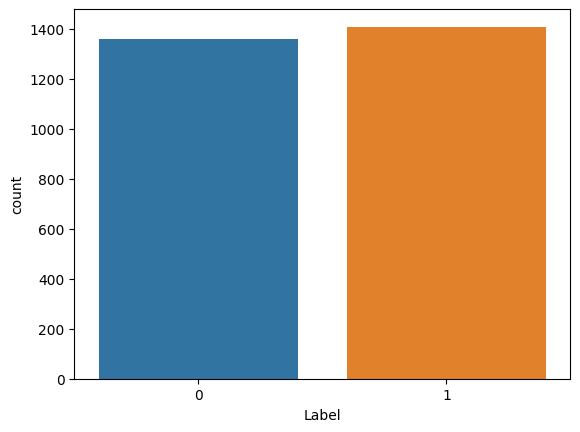

In [59]:
#Understand the data
# The dataset includes almost the same number of flooded and not flooded locations
sns.countplot(x="Label", data=df) #0 - Notflooded   1 - Flooded

<ipython-input-60-976f8edbe709>:3: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


<Axes: >

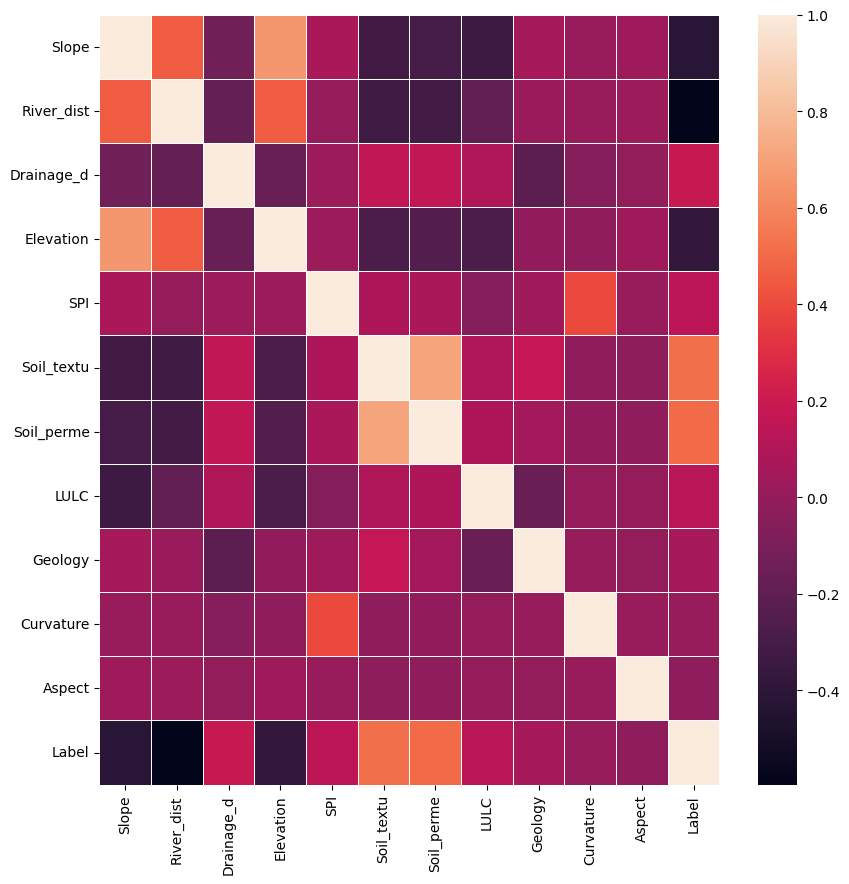

In [60]:
# Correlation between the input features

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)

In [61]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values

In [62]:
#Define the independent variables.
X = df.drop(labels = ["Label",'geometry'], axis=1)
features_list = list(X.columns)  #List features so we can rank them later.
from sklearn.preprocessing import normalize
# Only needed if the data was not normalized
X = normalize(X, axis=1)

In [63]:
# the independent variables
X

array([[1.17188095e-03, 9.99980278e-01, 4.87452331e-05, ...,
        3.97636310e-03, 1.98818155e-04, 9.94090775e-04],
       [3.87078146e-03, 9.99953814e-01, 3.78961359e-05, ...,
        5.17722076e-03, 1.03544415e-03, 3.45148050e-03],
       [1.95827590e-03, 9.99762633e-01, 1.42488126e-05, ...,
        4.10966638e-03, 2.73977758e-04, 1.36988879e-03],
       ...,
       [2.68520311e-04, 9.99967809e-01, 2.02534186e-05, ...,
        1.09958258e-03, 2.19916516e-04, 8.79666065e-04],
       [6.30863407e-04, 9.99967658e-01, 1.32353678e-05, ...,
        1.04220028e-03, 6.25320168e-04, 2.08440056e-03],
       [8.45659885e-04, 9.99777969e-01, 1.28650527e-04, ...,
        2.94311439e-03, 1.76586863e-03, 2.35449151e-03]])

In [64]:
# the dependent variable
Y

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
#Split data into train, validation and test to verify accuracy after fitting the model.
# Firstly split the data into train_validation and test datasets then split the train_validation dataset into train and validation datasets.
# The training dataset is used to train the model, the validation dataset is used for hyperparamter tuning and the testing dataset is used to test the model.
# It is recommended to test the model with a data that the model hasn't seen in the training process
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=42)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

In [67]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [68]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Model prediction
prediction = model.predict(X_test)

In [70]:
# Prediction are 1 (Flooded) and 0 (Not flooded)
prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [26]:
!pip install scikit-plot

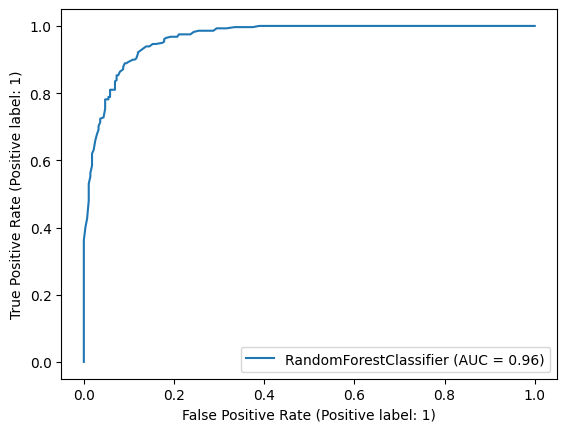

In [71]:
# Draw the Receiver Operating Characteristics and estimate the Area under the curve (AUC)
# for more information about the AUC, please see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

# from sklearn.metrics import plot_roc_curve
# from scikitplot.metrics import plot_roc_curve

# ax = plt.gca()
# model_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
# plt.show()

from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)

In [73]:
# In order to map the flood susceptibility, we need to predict the flood susceptibility (probability between 0 and 1)
prediction_prob=model.predict_proba(X_test)

In [74]:
# The probability of being not flooded and flooded for every location ( Their summation equals 1)
prediction_prob

array([[0.98, 0.02],
       [0.09, 0.91],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.83, 0.17]])

In [75]:
ls=prediction_prob[:,1]
ls.shape

(554,)

In [76]:
# As flood susceptibility is classification problem (flooded or not flooded), we can calculate some additional performance indices
from sklearn.metrics import classification_report
target_names=["Not Flooded","Flooded"]
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Flooded       0.91      0.88      0.90       275
     Flooded       0.89      0.92      0.90       279

    accuracy                           0.90       554
   macro avg       0.90      0.90      0.90       554
weighted avg       0.90      0.90      0.90       554



In [77]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, prediction))

0.7977706798774525


In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[242  33]
 [ 23 256]]


In [79]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Soil_perme    0.199487
Soil_textu    0.187355
Drainage_d    0.117440
LULC          0.108036
Elevation     0.104205
Aspect        0.068863
Geology       0.056169
Curvature     0.043871
Slope         0.041799
River_dist    0.039852
SPI           0.032922
dtype: float64


<Axes: >

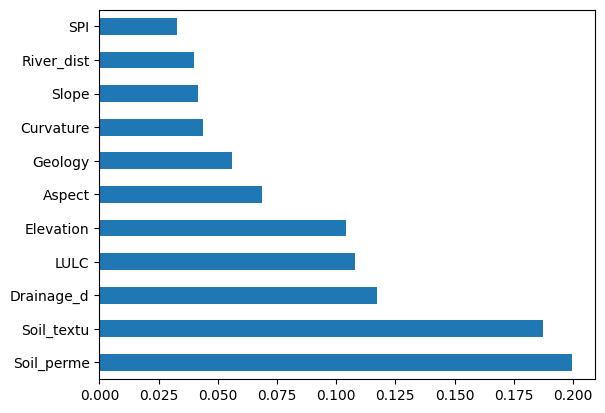

In [80]:
feature_imp.plot.barh()

Apply on Bangladesh

In [99]:
df=gpd.read_file("/content/drive/MyDrive/Bangladesh Flood Susceptibility/FSM_data.shp")
df.head()

,OBJECTID,Bin,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect,Flood,geometry
0,1.0,0,5.894235,5029.622559,0.245175,21,-9.168831,2,2,2,20,1,5,0,POINT (92.10423 21.34454)
1,2.0,0,11.214844,2897.173584,0.109797,17,-1.612072,2,2,4,15,3,10,0,POINT (92.15584 21.15506)
2,3.0,0,7.147573,3649.064941,0.052007,77,-8.976060,2,2,2,15,1,5,0,POINT (92.17267 21.08142)
3,5.0,0,6.220735,5389.588867,0.141945,37,-9.115022,2,2,2,20,3,7,0,POINT (92.09751 21.23788)
4,6.0,0,10.389720,6310.666504,0.148418,22,-0.591980,2,2,2,20,3,9,0,POINT (92.11666 21.20269)


In [87]:
df = df[df.Flood != 0]
df.head()

,OBJECTID,Bin,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect,Flood,geometry
5,7.0,1,1.974154,2016.049561,0.315873,6,-1.952549,4,2,2,15,3,6,1,POINT (92.13377 21.44712)
7,9.0,1,2.031340,803.531433,0.213950,6,-10.219064,4,2,3,21,2,5,1,POINT (92.03733 21.44155)
15,17.0,1,0.338695,697.483154,0.004733,4,-0.130387,4,2,2,29,2,7,1,POINT (89.14908 21.94045)
16,18.0,1,4.071603,556.252930,0.019476,7,-0.836628,4,2,2,2,1,7,1,POINT (89.71271 21.91963)
17,19.0,1,0.000000,672.016541,0.007805,0,-3.324208,4,2,2,29,2,2,1,POINT (89.56166 21.73039)


In [100]:
X_hotspot0= df.drop(labels = ["geometry",'OBJECTID','Bin','Flood'], axis=1)
X_hotspot0.head()

,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect
0,5.894235,5029.622559,0.245175,21,-9.168831,2,2,2,20,1,5
1,11.214844,2897.173584,0.109797,17,-1.612072,2,2,4,15,3,10
2,7.147573,3649.064941,0.052007,77,-8.976060,2,2,2,15,1,5
3,6.220735,5389.588867,0.141945,37,-9.115022,2,2,2,20,3,7
4,10.389720,6310.666504,0.148418,22,-0.591980,2,2,2,20,3,9


In [101]:
prediction_prob=model.predict_proba(X_hotspot0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [104]:
ls_hotspot0=prediction_prob[:,1]
ls_hotspot0

array([0.77, 0.77, 0.77, ..., 0.77, 0.77, 0.77])

In [105]:
df['FSM']=ls_hotspot0
df.head()

,OBJECTID,Bin,Slope,River_dist,Drainage_d,Elevation,SPI,Soil_textu,Soil_perme,LULC,Geology,Curvature,Aspect,Flood,geometry,FSM
0,1.0,0,5.894235,5029.622559,0.245175,21,-9.168831,2,2,2,20,1,5,0,POINT (92.10423 21.34454),0.77
1,2.0,0,11.214844,2897.173584,0.109797,17,-1.612072,2,2,4,15,3,10,0,POINT (92.15584 21.15506),0.77
2,3.0,0,7.147573,3649.064941,0.052007,77,-8.976060,2,2,2,15,1,5,0,POINT (92.17267 21.08142),0.77
3,5.0,0,6.220735,5389.588867,0.141945,37,-9.115022,2,2,2,20,3,7,0,POINT (92.09751 21.23788),0.77
4,6.0,0,10.389720,6310.666504,0.148418,22,-0.591980,2,2,2,20,3,9,0,POINT (92.11666 21.20269),0.77


In [106]:
df.to_file("/content/drive/MyDrive/Bangladesh Flood Susceptibility/FSM_output.shp")

This layer is imported in QGIS and Raster -> Analysis -> Grid (Inverse Distance to a Power) is ran to convert point to raster.